In [137]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [138]:
train= pd.read_csv("train.csv",parse_dates=["Dates"],index_col=False)

In [139]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Id
0,2013-06-28 17:40:00,SEX OFFENSES FORCIBLE,"FORCIBLE RAPE, BODILY FORCE",Friday,MISSION,NONE,2100 Block of MISSION ST,-122.419331,37.762264,141546
1,2004-02-19 02:46:00,LIQUOR LAWS,CONSUMING ALCOHOL IN PUBLIC VIEW,Thursday,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,794152
2,2007-11-14 00:01:00,FRAUD,"CREDIT CARD, THEFT BY USE OF",Wednesday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,531205
3,2007-12-27 18:30:00,ROBBERY,ROBBERY OF A CHAIN STORE WITH A GUN,Thursday,BAYVIEW,DISTRICT ATTORNEY REFUSES TO PROSECUTE,2400 Block of SAN BRUNO AV,-122.404715,37.730161,523137
4,2012-09-09 17:02:00,OTHER OFFENSES,PROBATION VIOLATION,Sunday,SOUTHERN,"ARREST, BOOKED",4TH ST / STEVENSON ST,-122.405239,37.785265,200968


In [140]:
train = train.drop(["Descript","Resolution"],axis=1)

In [141]:
def datesplit(data):
    data["Year"] = data["Dates"].dt.year
    data["Month"] = data["Dates"].dt.month
    data["Day"] = data["Dates"].dt.day
    data["Hour"] = data["Dates"].dt.hour
    data["Minute"] = data["Dates"].dt.minute
    return data

In [142]:
train= datesplit(train)

In [143]:
train.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,Id,Year,Month,Day,Hour,Minute
0,2013-06-28 17:40:00,SEX OFFENSES FORCIBLE,Friday,MISSION,2100 Block of MISSION ST,-122.419331,37.762264,141546,2013,6,28,17,40
1,2004-02-19 02:46:00,LIQUOR LAWS,Thursday,SOUTHERN,1000 Block of MARKET ST,-122.411340,37.781271,794152,2004,2,19,2,46
2,2007-11-14 00:01:00,FRAUD,Wednesday,SOUTHERN,800 Block of BRYANT ST,-122.403405,37.775421,531205,2007,11,14,0,1
3,2007-12-27 18:30:00,ROBBERY,Thursday,BAYVIEW,2400 Block of SAN BRUNO AV,-122.404715,37.730161,523137,2007,12,27,18,30
4,2012-09-09 17:02:00,OTHER OFFENSES,Sunday,SOUTHERN,4TH ST / STEVENSON ST,-122.405239,37.785265,200968,2012,9,9,17,2


In [144]:
#train = pd.concat([train,pd.get_dummies(train.Category)], axis=1)

In [145]:
cat_encoder=LabelEncoder()
cat_encoder.fit(train["Category"])
cat_encoder.classes_.shape

(36,)

In [146]:
train["CategoryEncoded"] = cat_encoder.transform(train["Category"])

In [147]:
train["CategoryEncoded"].head()

0    27
1    17
2    13
3    24
4    21
Name: CategoryEncoded, dtype: int32

In [148]:
train["Category"] = train["CategoryEncoded"]

In [149]:
train = pd.concat([train,pd.get_dummies(train.PdDistrict)], axis=1)
train = pd.concat([train,pd.get_dummies(train.DayOfWeek)], axis=1)

In [150]:
add_encoder = LabelEncoder()

In [151]:
train['StreetNo'] = train['Address'].apply(lambda x: x.split(' ', 1)[0] if x.split(' ', 1)[0].isdigit() else 0)
train["Intersection"]= train["Address"].apply(lambda x: 1 if "/" in x else 0)
train['Address'] = train['Address'].apply(lambda x: x.split(' ', 1)[1] if x.split(' ', 1)[0].isdigit() else x)
add_encoder.fit(train["Address"])
train["Address"]= add_encoder.transform(train["Address"])

In [152]:
train["Morning"] = train["Hour"].apply(lambda x: 1 if x>= 6 and x < 12 else 0)
train["Noon"] = train["Hour"].apply(lambda x: 1 if x>= 12 and x < 17 else 0)
train["Evening"] = train["Hour"].apply(lambda x: 1 if x>= 17 and x < 20 else 0)
train["Night"] = train["Hour"].apply(lambda x: 1 if x >= 20 or x < 6 else 0)
train["Fall"] = train["Month"].apply(lambda x: 1 if x>=3 and x <=5 else 0)
train["Winter"] = train["Month"].apply(lambda x: 1 if x>=6 and x <=8 else 0)
train["Spring"] = train["Month"].apply(lambda x: 1 if x>=9 and x <=11 else 0)
train["Summer"] = train["Month"].apply(lambda x: 1 if x>=12 or x <=2 else 0)

In [153]:
train.shape

(867873, 41)

In [154]:
train_columns = list(train.columns.values)
print(train_columns)

['Dates', 'Category', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y', 'Id', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'CategoryEncoded', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'StreetNo', 'Intersection', 'Morning', 'Noon', 'Evening', 'Night', 'Fall', 'Winter', 'Spring', 'Summer']


In [155]:
train = train.drop(["CategoryEncoded","DayOfWeek"], axis=1)

In [156]:
train = train.drop(["PdDistrict"],axis=1)

In [157]:
train = train.drop(["Dates"],axis=1)

In [158]:
train['StreetNo'] = train['StreetNo'].astype(int)

In [159]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867873 entries, 0 to 867872
Data columns (total 37 columns):
Category        867873 non-null int32
Address         867873 non-null int32
X               867873 non-null float64
Y               867873 non-null float64
Id              867873 non-null int64
Year            867873 non-null int64
Month           867873 non-null int64
Day             867873 non-null int64
Hour            867873 non-null int64
Minute          867873 non-null int64
BAYVIEW         867873 non-null uint8
CENTRAL         867873 non-null uint8
INGLESIDE       867873 non-null uint8
MISSION         867873 non-null uint8
NORTHERN        867873 non-null uint8
PARK            867873 non-null uint8
RICHMOND        867873 non-null uint8
SOUTHERN        867873 non-null uint8
TARAVAL         867873 non-null uint8
TENDERLOIN      867873 non-null uint8
Friday          867873 non-null uint8
Monday          867873 non-null uint8
Saturday        867873 non-null uint8
Sunday     

In [160]:
training,validation = train_test_split(train, train_size=0.80,random_state=51)

C:\Users\Dipta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [161]:
#train = train.drop(["Category"],axis=1)

In [162]:
from catboost import CatBoostClassifier

In [172]:
model=CatBoostClassifier(iterations=1000, depth=5, learning_rate=0.01, loss_function='MultiClass')

In [164]:
train.head()

,Category,Address,X,Y,Id,Year,Month,Day,Hour,Minute,...,StreetNo,Intersection,Morning,Noon,Evening,Night,Fall,Winter,Spring,Summer
0,27,4423,-122.419331,37.762264,141546,2013,6,28,17,40,...,2100,0,0,0,1,0,0,1,0,0
1,17,4354,-122.411340,37.781271,794152,2004,2,19,2,46,...,1000,0,0,0,0,1,0,0,0,1
2,13,3493,-122.403405,37.775421,531205,2007,11,14,0,1,...,800,0,0,0,0,1,0,0,1,0
3,24,4773,-122.404715,37.730161,523137,2007,12,27,18,30,...,2400,0,0,0,1,0,0,0,0,1
4,21,1760,-122.405239,37.785265,200968,2012,9,9,17,2,...,0,1,0,0,1,0,0,0,1,0


In [165]:
train.columns
features=['Address', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN',
       'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'StreetNo', 'Intersection', 'Morning', 'Noon', 'Evening', 'Night',
       'Fall', 'Winter', 'Spring', 'Summer']


In [166]:
train['Category']

0         27
1         17
2         13
3         24
4         21
5         34
6          4
7         30
8         21
9          7
10        16
11        21
12        32
13         1
14         7
15        16
16         7
17        33
18        19
19        21
20        20
21         1
22         8
23        20
24        21
25        34
26        16
27        24
28        33
29        16
          ..
867843    16
867844    21
867845     7
867846    19
867847    16
867848     7
867849    33
867850    13
867851     7
867852    16
867853    20
867854    20
867855    16
867856    30
867857    21
867858    15
867859    32
867860    16
867861    21
867862    16
867863    16
867864    21
867865    20
867866    16
867867     7
867868    16
867869    26
867870    16
867871    21
867872    16
Name: Category, Length: 867873, dtype: int32

In [167]:
Y_train = train['Category']

In [168]:
X_train = train[features]

In [169]:
import seaborn as sns

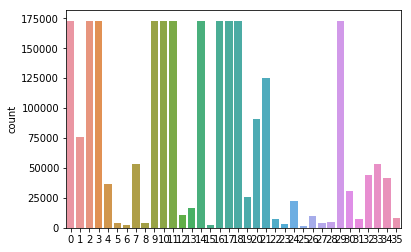

In [175]:
sns.countplot(Y_train)

In [171]:
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE

In [173]:
sm = SMOTE(sampling_strategy='minority',random_state=0)
ed = EditedNearestNeighbours(sampling_strategy='majority',random_state=0)

In [174]:
for i in range(0,10):
    X_train, Y_train = sm.fit_sample(X_train,Y_train.ravel())

In [ ]:
model_catBoost = model.fit(X_train,Y_train)

0:	learn: -3.5562489	total: 18.3s	remaining: 5h 4m
1:	learn: -3.5302678	total: 50.8s	remaining: 7h 2m 50s


In [135]:
ypredict=model_catBoost.predict_proba(train[features])

In [ ]:
ypredict.shape

In [136]:
print(log_loss(train['Category'],ypredict))

2.9592542790193805


In [ ]:
test=pd.read_csv("../input/test.csv",parse_dates=["Dates"],index_col=False)

In [ ]:
test.head()

In [ ]:
test = test.drop(["Descript","Resolution"],axis=1)

In [ ]:
def datesplit(data):
    data["Year"] = data["Dates"].dt.year
    data["Month"] = data["Dates"].dt.month
    data["Day"] = data["Dates"].dt.day
    data["Hour"] = data["Dates"].dt.hour
    data["Minute"] = data["Dates"].dt.minute
    return data

In [ ]:
test= datesplit(test)

In [ ]:
test = pd.concat([test,pd.get_dummies(test.PdDistrict)], axis=1)
test = pd.concat([test,pd.get_dummies(test.DayOfWeek)], axis=1)

In [ ]:
add_encoder = LabelEncoder()

In [ ]:
test['StreetNo'] = test['Address'].apply(lambda x: x.split(' ', 1)[0] if x.split(' ', 1)[0].isdigit() else 0)
test["Intersection"]= test["Address"].apply(lambda x: 1 if "/" in x else 0)
test['Address'] = test['Address'].apply(lambda x: x.split(' ', 1)[1] if x.split(' ', 1)[0].isdigit() else x)
add_encoder.fit(test["Address"])
test["Address"]= add_encoder.transform(test["Address"])

In [ ]:
test["Morning"] = test["Hour"].apply(lambda x: 1 if x>= 6 and x < 12 else 0)
test["Noon"] = test["Hour"].apply(lambda x: 1 if x>= 12 and x < 17 else 0)
test["Evening"] = test["Hour"].apply(lambda x: 1 if x>= 17 and x < 20 else 0)
test["Night"] = test["Hour"].apply(lambda x: 1 if x >= 20 or x < 6 else 0)
test["Fall"] = test["Month"].apply(lambda x: 1 if x>=3 and x <=5 else 0)
test["Winter"] = test["Month"].apply(lambda x: 1 if x>=6 and x <=8 else 0)
test["Spring"] = test["Month"].apply(lambda x: 1 if x>=9 and x <=11 else 0)
test["Summer"] = test["Month"].apply(lambda x: 1 if x>=12 or x <=2 else 0)

In [ ]:
test.shape

In [ ]:
test.head()

In [ ]:
test = test.drop(["DayOfWeek"], axis=1)

In [ ]:
test = test.drop(["PdDistrict","Dates"],axis=1)

In [ ]:
test.shape

In [ ]:
test['StreetNo'] = test['StreetNo'].astype(int)

In [ ]:
test.info()

In [ ]:
test.shape

In [ ]:
test_features=[ 'Address', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN',
       'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'StreetNo', 'Intersection', 'Morning', 'Noon', 'Evening', 'Night',
       'Fall', 'Winter', 'Spring', 'Summer']


In [ ]:
ypredict=model_catBoost.predict_proba(test[test_features])

In [ ]:
ypredict.shape

In [ ]:
result=pd.DataFrame(ypredict,columns=cat_encoder.classes_)
result['Id']=test['Id']

In [ ]:
result.to_csv('predictionCatBoostOct',index=False,index_label='Id')